# Compare models

In [1]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer

## Load Data

In [2]:
data_processed = '../data/processed/'  # directorio que contiene data procesada

In [3]:
df = pd.read_csv(data_processed+'to_train_models.csv',usecols=['full_text','sentiment_tag'],dtype=str)
df.head(5)

,full_text,sentiment_tag
0,lelo andrés arauz dicho q gestionado gobierno ...,Negativo
1,edad enterar jorge glas andrés arauz primo,Negativo
2,extraordinario caravana lojo recibir andrés ar...,Positivo
3,david villamar mildeunar propuesta andrés arau...,Negativo
4,andrés arauz ganador debatepresidencial según ...,Negativo


In [4]:
df.dropna(axis=0,inplace=True)

##### Nota: Random State es para que siempre se puede reproducir los mismos valores para cada partición, y la partición esta realizada a 80% entrenamiento y 20% de testing

In [5]:
X = df.full_text
y = df.sentiment_tag
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

## Load Models

In [6]:
data_models = '../models/'  # directorio que contiene data procesada

#### SVC

In [7]:
svc_model = joblib.load(data_models+"SVC.sav")

#### Random Forest

In [8]:
rf_model = joblib.load(data_models+"Random_Forest.sav")

#### Naive Bayes

In [9]:
nb_model = joblib.load(data_models+"Naive_Bayes.sav")

## TF-IDF

In [10]:
# settings for count vectorizer
tfidf_vectorizer_bigram = TfidfVectorizer(ngram_range=(1,2),use_idf=True) 

# sending train_data to vector
X_train_tf_bigram = tfidf_vectorizer_bigram.fit_transform(X_train)
print("n_samples: %d, n_features: %d" % X_train_tf_bigram.shape)

n_samples: 32339, n_features: 163603


In [11]:
# sending test_data to vector
X_test_tf_bigram = tfidf_vectorizer_bigram.transform(X_test)
print("n_samples: %d, n_features: %d" % X_test_tf_bigram.shape)

n_samples: 8085, n_features: 163603


## Evaluate the Models

In [53]:
eval_models = {
    "Model": [],
    "Metric": [],
    "Values": []
}

In [54]:
#metrics = ["Precision","Recall","F1_Scrore"]
models = {"SVC": svc_model,
          "Random Forest": rf_model,
          "Naive Bayes": nb_model
         }
metrics_eval = {"Precision": lambda y_test,nb_pred: metrics.precision_score(y_test, nb_pred,average='weighted'),
          "Recall": lambda y_test,nb_pred: metrics.recall_score(y_test, nb_pred,average='weighted'),
          "F1_Scrore": lambda y_test,nb_pred: metrics.f1_score(y_test, nb_pred,average='weighted')}
def eval_metric(X_test,y_test):
    global metrics,models
    for name_model,model in models.items():
        prediction = model.predict(X_test)
        for name_metric,metric in metrics_eval.items():
            eval_models["Model"].append(name_model)
            eval_models["Metric"].append(name_metric)
            eval_models["Values"].append(round(metric(y_test,prediction)*100,1)) 

## Graphic of the Scores

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
eval_metric(X_test_tf_bigram,y_test)
#models["SVC"].predict()

In [57]:
df_eval = pd.DataFrame(eval_models)

<Figure size 432x288 with 0 Axes>

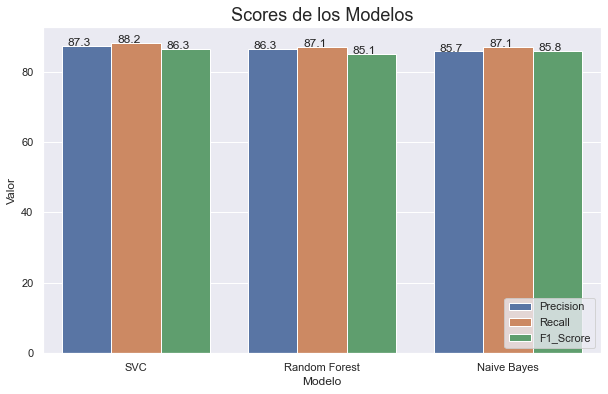

In [59]:
plt.figure()

sns.set(font_scale=1)
plt.figure(figsize=(10, 6))

ax = sns.barplot(x="Model", y="Values", hue="Metric", data=df_eval,alpha=1)
plt.title('Scores de los Modelos', fontsize=18)
plt.ylabel('Valor', fontsize=12)
plt.xlabel('Modelo', fontsize=12)
plt.legend(loc='lower right')

for p in ax.patches:
        ax.text(p.xy[0] + p.get_width()/8, p.xy[1] + p.get_height()+0.009, 
                str(round(p.get_height(), 3)), fontsize=12)
plt.show()